In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category= FutureWarning)
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head(15)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


#### drop emp id

In [4]:
train.drop('employee_id',axis=1,inplace=True)

In [5]:
train.head(15)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [6]:
train['Region'] = train['region'].str.split('_').str[1]

In [7]:
train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
train.shape

(54808, 14)

In [9]:
train['Region'] = train['Region'].astype(int)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
 13  Region                54808 non-null  int32  
dtypes: float64(1), int32(1), int64(7), object(5)
memory usage: 5.6+ MB


In [11]:
train.drop('region',axis=1,inplace=True)

In [12]:
train['department'].nunique()

9

In [13]:
train.isnull().sum()

department                 0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
Region                     0
dtype: int64

In [14]:
nullPer = train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
nullCount = train.isnull().sum()
trainNullDF = pd.DataFrame([nullCount,nullPer]).T
trainNullDF.columns = ['NUllvalues','NullPercentage']
trainNullDF.sort_values(by = 'NUllvalues',ascending= False,inplace=True)
trainNullDF.reset_index(inplace=True)
trainNullDF.head(10)

,index,NUllvalues,NullPercentage
0,previous_year_rating,4124.0,7.52
1,education,2409.0,4.40
2,department,0.0,0.00
3,gender,0.0,0.00
4,recruitment_channel,0.0,0.00
5,no_of_trainings,0.0,0.00
6,age,0.0,0.00
7,length_of_service,0.0,0.00
8,KPIs_met >80%,0.0,0.00
9,awards_won?,0.0,0.00


In [15]:
train['previous_year_rating'].fillna(train['previous_year_rating'].median(),inplace=True)

In [16]:
train['education'].fillna(train['education'].mode()[0],inplace=True)

In [17]:
nullPer = train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
nullCount = train.isnull().sum()
trainNullDF = pd.DataFrame([nullCount,nullPer]).T
trainNullDF.columns = ['NUllvalues','NullPercentage']
trainNullDF.sort_values(by = 'NUllvalues',ascending= False,inplace=True)
trainNullDF.reset_index(inplace=True)
trainNullDF.head(10)

,index,NUllvalues,NullPercentage
0,department,0.0,0.0
1,education,0.0,0.0
2,gender,0.0,0.0
3,recruitment_channel,0.0,0.0
4,no_of_trainings,0.0,0.0
5,age,0.0,0.0
6,previous_year_rating,0.0,0.0
7,length_of_service,0.0,0.0
8,KPIs_met >80%,0.0,0.0
9,awards_won?,0.0,0.0


In [18]:
NumericalCols = train.select_dtypes(include= np.number).columns

In [19]:
objectCols = train.select_dtypes(include=object).columns

In [20]:
objectCols

Index(['department', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [21]:
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [22]:
continuescols = []
discretecols = []

for cols in NumericalCols:
    if train[cols].nunique()>20:
        continuescols.append(cols)
    else:
        discretecols.append(cols)

In [23]:
continuescols

['age', 'length_of_service', 'avg_training_score', 'Region']

In [24]:
discretecols

['no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted']

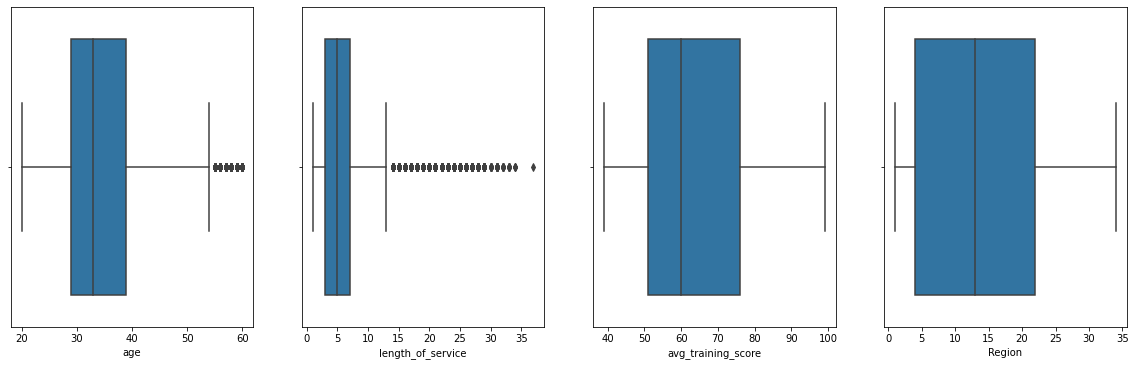

In [25]:
j=0
plt.figure(figsize=(20,20))
for cols in continuescols:
 plt.subplot(3,4,j+1)
 sns.boxplot(cols,data=train)
 plt.xlabel(cols)
 j+=1
    


In [26]:
for columns in continuescols:
    upper_lim = train[columns].mean()+train[columns].std()*3
    lower_lim = train[columns].mean()-train[columns].std()*3

    train.loc[(train[columns]>upper_lim),columns] = upper_lim
    train.loc[(train[columns]<lower_lim),columns] = lower_lim

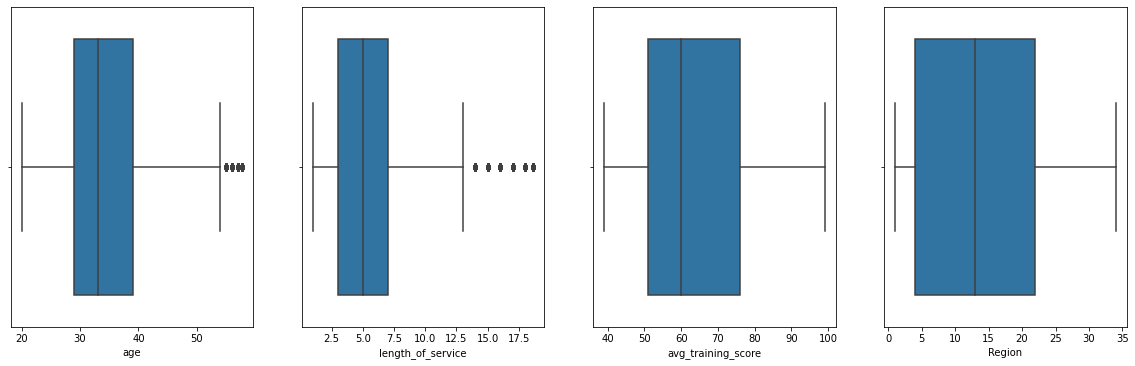

In [27]:
j=0
plt.figure(figsize=(20,20))
for cols in continuescols:
 plt.subplot(3,4,j+1)
 sns.boxplot(cols,data=train)
 plt.xlabel(cols)
 j+=1
    

In [28]:
trainObjectDF = train[objectCols]

In [29]:
from collections import defaultdict
defaultEncoder = defaultdict(LabelEncoder)

In [31]:
# variable encoding 
fittrainObjectDF = trainObjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))


In [32]:
fittrainObjectDF

,department,education,gender,recruitment_channel
0,7,2,0,2
1,4,0,1,0
2,7,0,1,2
3,7,0,1,0
4,8,0,1,0
...,...,...,...,...
54803,8,0,1,2
54804,4,2,0,0
54805,0,0,1,0
54806,7,0,1,2


In [33]:
train.drop(objectCols,axis=1,inplace=True)

In [34]:
updatedTrain = pd.concat([train,fittrainObjectDF],axis = 1)

In [35]:
updatedTrain

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Region,department,education,gender,recruitment_channel
0,1,35.0,5.0,8.0,1,0,49.0,0,7.0,7,2,0,2
1,1,30.0,5.0,4.0,0,0,60.0,0,22.0,4,0,1,0
2,1,34.0,3.0,7.0,0,0,50.0,0,19.0,7,0,1,2
3,2,39.0,1.0,10.0,0,0,50.0,0,23.0,7,0,1,0
4,1,45.0,3.0,2.0,0,0,73.0,0,26.0,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,48.0,3.0,17.0,0,0,78.0,0,14.0,8,0,1,2
54804,1,37.0,2.0,6.0,0,0,56.0,0,27.0,4,2,0,0
54805,1,27.0,5.0,3.0,1,0,79.0,0,1.0,0,0,1,0
54806,1,29.0,1.0,2.0,0,0,45.0,0,9.0,7,0,1,2


In [38]:
corrDF = updatedTrain.corr()

In [39]:
corrDF.sum()

no_of_trainings         0.813195
age                     1.646840
previous_year_rating    1.428032
length_of_service       1.566785
KPIs_met >80%           1.461504
awards_won?             1.335258
avg_training_score      1.140988
is_promoted             1.709644
Region                  0.503140
department              0.634852
education               1.549661
gender                  1.004777
recruitment_channel     0.977668
dtype: float64

In [43]:
abs(corrDF['is_promoted']).sort_values(ascending=False)

is_promoted             1.000000
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
previous_year_rating    0.153230
education               0.029257
no_of_trainings         0.024896
age                     0.017169
gender                  0.011109
Region                  0.011007
length_of_service       0.009620
recruitment_channel     0.002229
department              0.000130
Name: is_promoted, dtype: float64